<a href="https://colab.research.google.com/github/d1n3sh30/LGM-VIP-Data-Science/blob/main/Iris_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LGM VIP- DATA SCIENCE (AUG 2023)

NAME- DINESH KUMAR N

TASK1- IRIS FLOWERS CLASSIFICATION

Dataset Link-http://archive.ics.uci.edu/dataset/53/iris

IMPORTING LIBRARIES


In [ ]:
#importing  all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

LOADING THE DATASET

In [ ]:
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
               names=["sepal_length_in_cm","sepal_width_in_cm","petal_length_in_cm","petal_width_in_cm","class"])

In [ ]:
df.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


DATA ANALYSIS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length_in_cm  150 non-null    float64
 1   sepal_width_in_cm   150 non-null    float64
 2   petal_length_in_cm  150 non-null    float64
 3   petal_width_in_cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


DATA VISUALIZATION

<Axes: xlabel='sepal_width_in_cm', ylabel='petal_width_in_cm'>

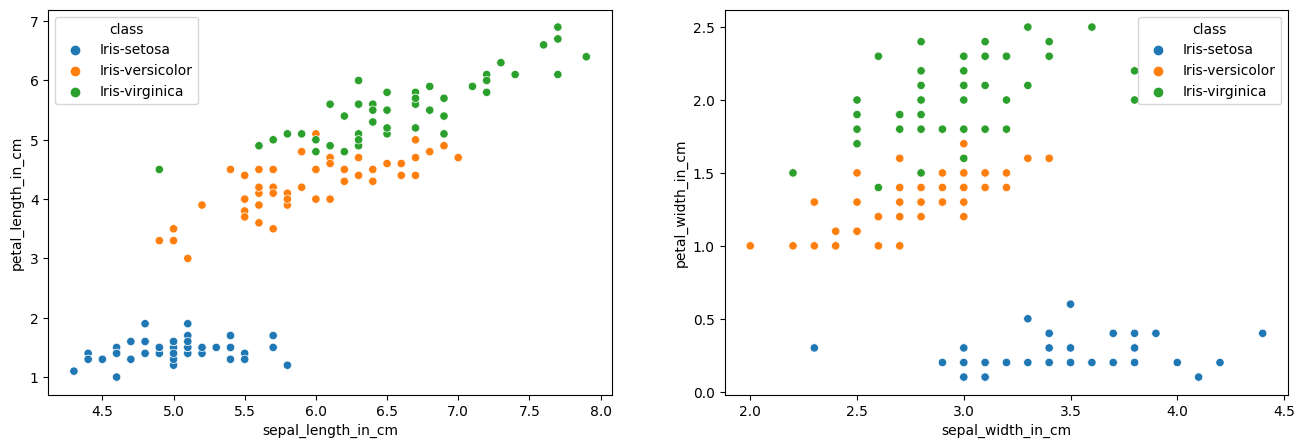

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot (x='sepal_length_in_cm',y='petal_length_in_cm',data=df,hue='class',ax=ax1)
sns.scatterplot (x='sepal_width_in_cm',y='petal_width_in_cm',data=df,hue='class',ax=ax2)

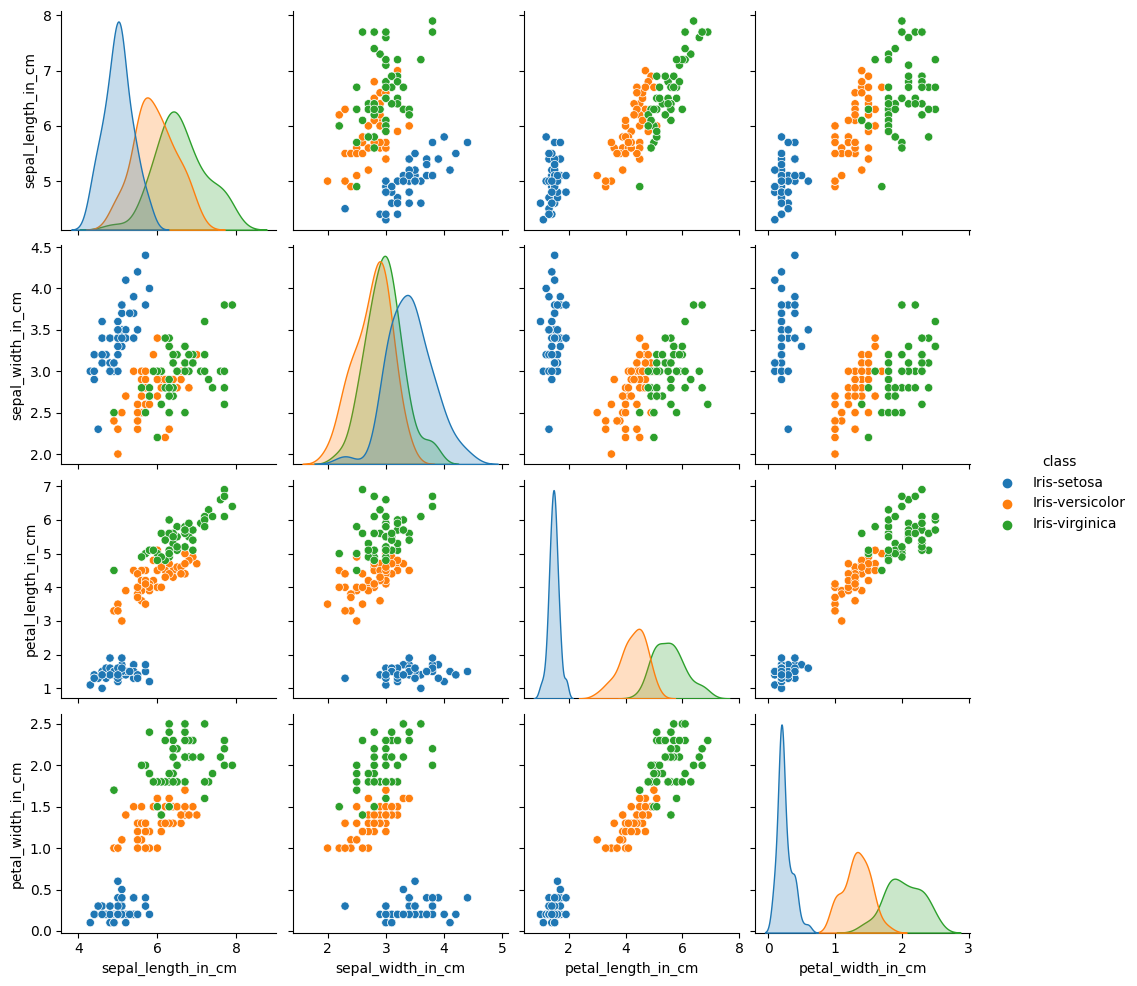

In [ ]:
sns.pairplot(df,hue="class")

<ipython-input-7-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

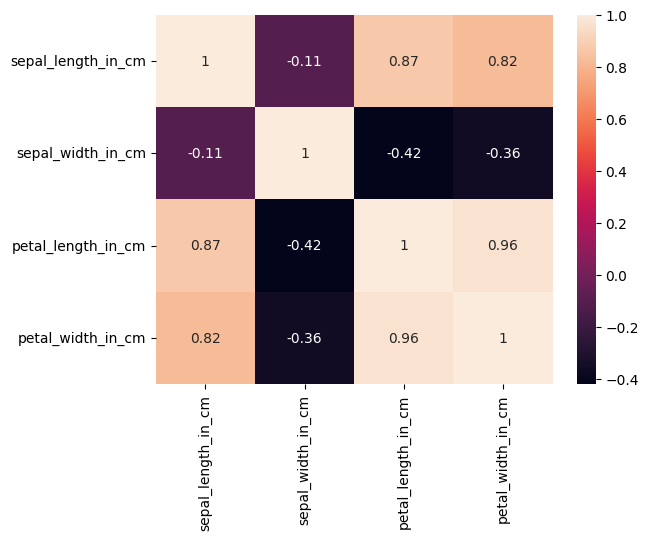

In [ ]:
sns.heatmap(df.corr(),annot=True)

BUILDING, TRAINING AND TESTING THE MODEL


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['class']=le.fit_transform=(df['class'])
df.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


PREPARING THE DATA FOR TRAINING


In [ ]:
X=df[['sepal_length_in_cm','sepal_width_in_cm','petal_length_in_cm','petal_width_in_cm']]
Y=df['class']

In [ ]:
#splitting dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test,  Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model=LogisticRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Accuracy of the logistic regression on the test set:{:f}'.format(model.score(X_test,Y_test)))

Accuracy of the logistic regression on the test set:0.966667


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
from sklearn.metrics import accuracy_score
train_score=str(model.score(X_train,Y_train)*100)
test_score=str(model.score(X_test,Y_test)*100)
accu_score=str(accuracy_score(Y_test,y_pred)*100)
print(f'Train score:{train_score[:6]}%\n Test score:{test_score[:6]}%\n Accuracy score:{accu_score[:6]}%')


Train score:98.333%
 Test score:96.666%
 Accuracy score:96.666%
